# Install Dependencies and Download Files

In [1]:
!pip install pycocotools

In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-06-09 19:27:48--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.113.227
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.113.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  53.0MB/s    in 4.5s    

2020-06-09 19:27:53 (53.8 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [3]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [0]:
import numpy as np
from pycocotools.coco import COCO

import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# Load MS COCO Dataset Annotations

In [0]:
dataDir='.'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [6]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=18.50s)
creating index...
index created!


In [0]:
catIds = coco.getCatIds(catNms=['keyboard'])
imgIds = coco.getImgIds(catIds=catIds)

In [30]:
# Display uid(s) of class(es) called out above
catIds

[76]

In [33]:
# Display uid(s) of images containing the class(es) called out above
print('Total of {} images'.format(len(imgIds)))
imgIds[:20]

Total of 2115 images


[188416,
 73729,
 196608,
 417802,
 213003,
 417804,
 262162,
 253970,
 466967,
 458781,
 114729,
 188460,
 434222,
 286774,
 254007,
 491577,
 573501,
 139327,
 368706,
 335940]

# Retrieve and Display Random Image from Annotation Set

In [0]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [49]:
# Display img metadata about location and dims
img

{'coco_url': 'http://images.cocodataset.org/train2017/000000429735.jpg',
 'date_captured': '2013-11-15 17:13:44',
 'file_name': '000000429735.jpg',
 'flickr_url': 'http://farm3.staticflickr.com/2566/3882852672_8a282c3571_z.jpg',
 'height': 426,
 'id': 429735,
 'license': 1,
 'width': 640}

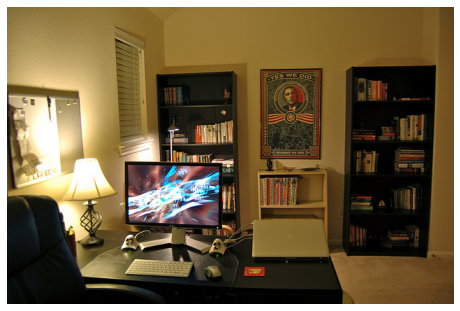

In [50]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

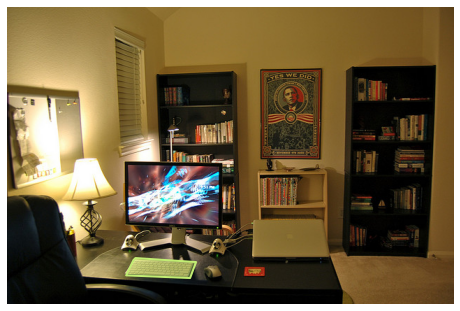

In [51]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [52]:
annIds

[1114757]

In [53]:
coco.loadAnns(annIds)

[{'area': 2201.9627500000015,
  'bbox': [170.02, 359.9, 100.29, 28.66],
  'category_id': 76,
  'id': 1114757,
  'image_id': 429735,
  'iscrowd': 0,
  'segmentation': [[183.39,
    359.9,
    270.31,
    365.63,
    261.71,
    388.56,
    170.02,
    384.74,
    180.52,
    362.77]]}]

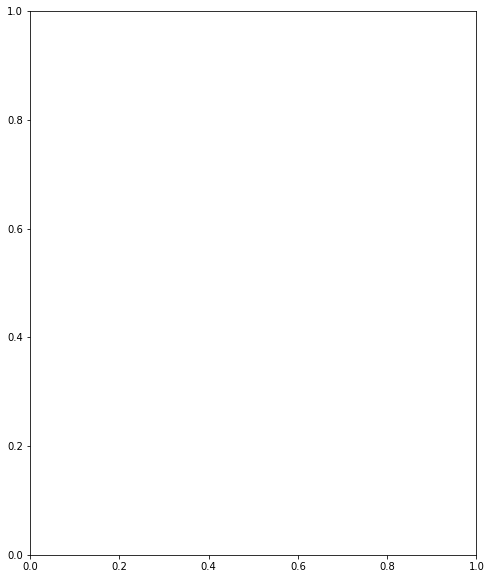

In [54]:
coco.showAnns(anns)

In [55]:
# Create make from annotations
mask = sum(
    (coco.annToMask(x) for x in anns)
)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(-0.5, 639.5, 425.5, -0.5)

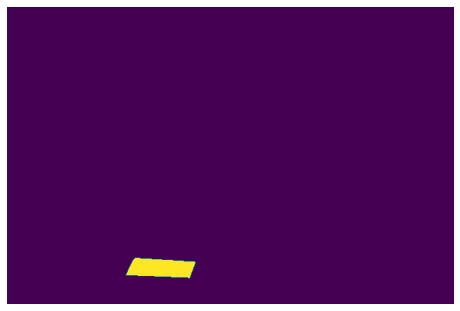

In [56]:
plt.imshow(mask)
plt.axis('off')